#### LIBRERIAS

In [109]:
import cv2 as cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import label

#### Cargamos la imagen y la mostramos

In [110]:
img = cv2.imread("./testaiimages/Test1.jpg")

cv2.imshow("Display window", img)
k = cv2.waitKey(0)
 
if k == ord("s"):
    cv2.imwrite("starry_night.png", img)

#### Dimensiones actuales de la imagen

In [111]:
img.shape

(720, 1280, 3)

#### Ajustamos la imagen a 1024x1024 pixeles

In [112]:
img_1024x1024 = cv2.resize(img, (1024, 1024))

In [113]:
img_1024x1024.shape

(1024, 1024, 3)

#### Partimos la imagen modificada

In [128]:
# Coordenadas para los cuadrantes
mid_x, mid_y = 1024 // 2, 1024 // 2

# Convertimos a RGB para matplotlib
img_rgb = cv2.cvtColor(img_1024x1024, cv2.COLOR_BGR2RGB)

# Extraemos los cuadrantes
top_left = img_rgb[:mid_y, :mid_x] # Cuadrante superior izquierdo
top_right = img_rgb[:mid_y, mid_x:] # Cuadrante superior derecho
bottom_left = img_rgb[mid_y:, :mid_x] # Cuadrante inferior izquierdo
bottom_right = img_rgb[mid_y:, mid_x:]  # Cuadrante inferior derecho

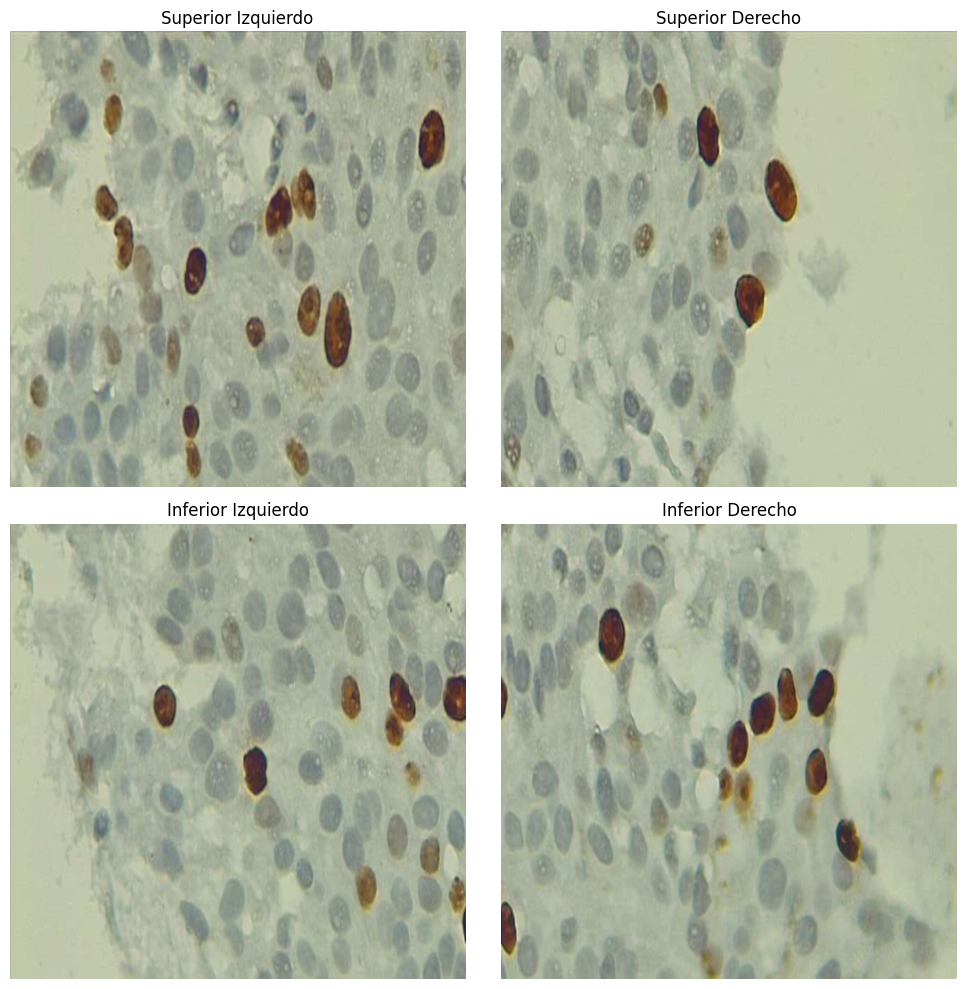

In [115]:
# Creamos una figura para mostrar las imágenes
plt.figure(figsize=(10, 10))

# Mostramos cada cuadrante
plt.subplot(2, 2, 1)
plt.imshow(top_left)
plt.title("Superior Izquierdo")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(top_right)
plt.title("Superior Derecho")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(bottom_left)
plt.title("Inferior Izquierdo")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(bottom_right)
plt.title("Inferior Derecho")
plt.axis("off")

plt.tight_layout()
plt.show()

#### Aplicamos ecualización a la imagen

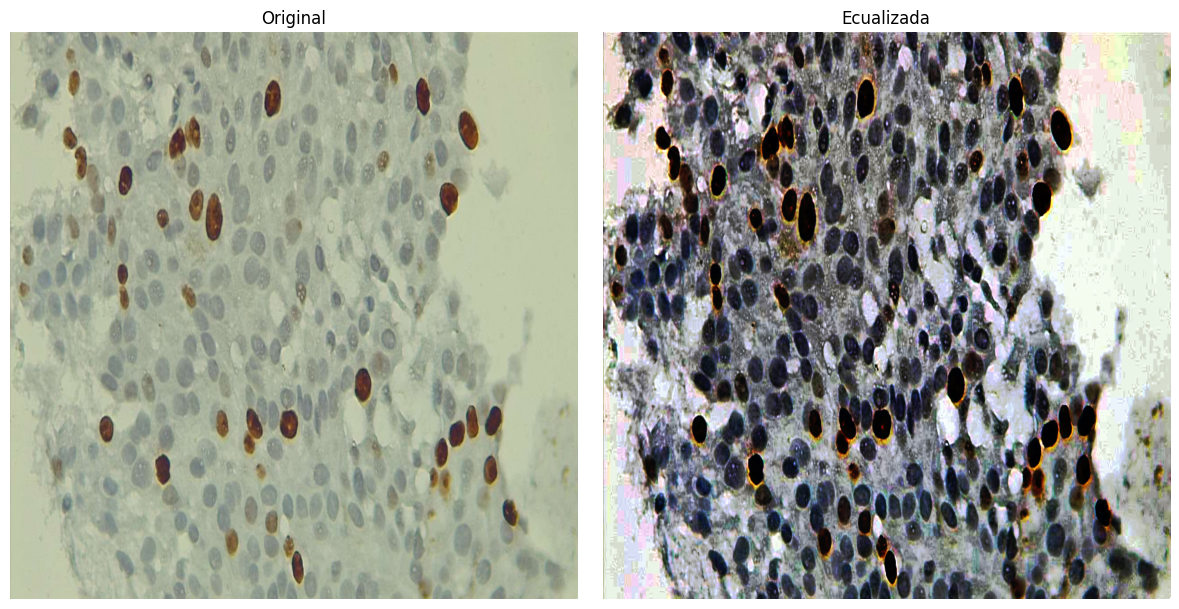

In [116]:
# Separamos canales de color (R, G, B) para luego ecualizar
r, g, b = cv2.split(img_rgb)

# Aplicamos ecualización al histograma de cada canal
r_eq = cv2.equalizeHist(r)
g_eq = cv2.equalizeHist(g)
b_eq = cv2.equalizeHist(b)

# Combinamos los canales ecualizados en una imagen
img_eq = cv2.merge((r_eq, g_eq, b_eq))

# Mostramos la imagen original y la ecualizada
plt.figure(figsize=(12, 6))

# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

# Imagen ecualizada
plt.subplot(1, 2, 2)
plt.imshow(img_eq)
plt.title("Ecualizada")
plt.axis("off")

plt.tight_layout()
plt.show()

Aumento el contraste, los detalles mejoraron.

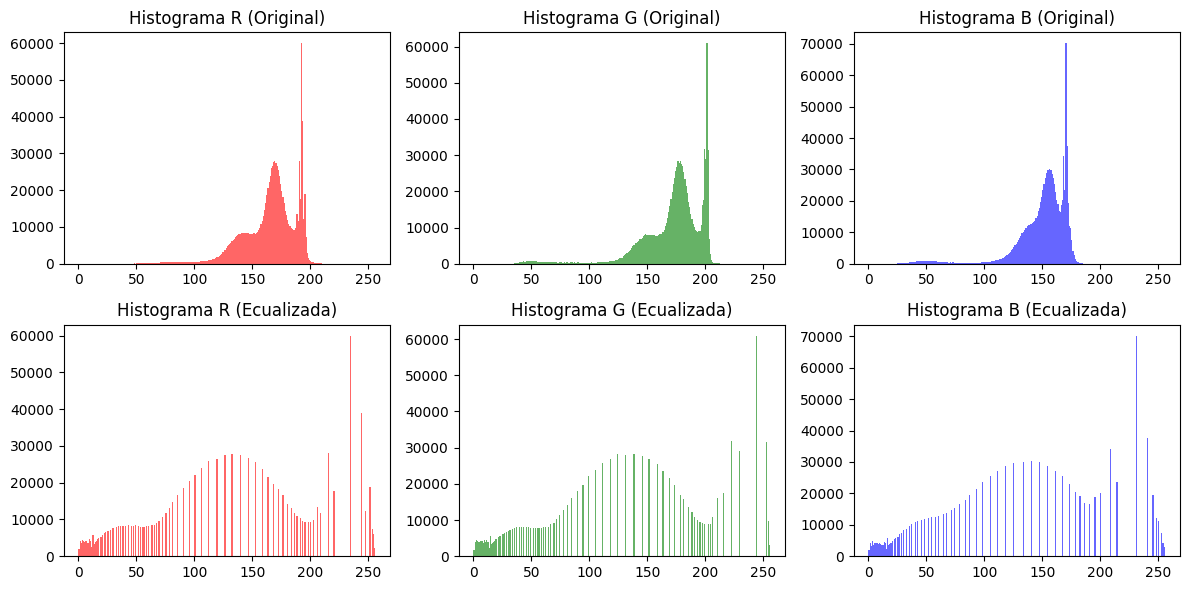

In [117]:
# Mostrar la imagen original y la ecualizada
plt.figure(figsize=(12, 6))

# Histogramas de la imagen original
plt.subplot(2, 3, 1)
plt.hist(r.ravel(), 256, [0, 256], color='red', alpha=0.6)
plt.title("Histograma R (Original)")
plt.subplot(2, 3, 2)
plt.hist(g.ravel(), 256, [0, 256], color='green', alpha=0.6)
plt.title("Histograma G (Original)")
plt.subplot(2, 3, 3)
plt.hist(b.ravel(), 256, [0, 256], color='blue', alpha=0.6)
plt.title("Histograma B (Original)")


# Histogramas de la imagen ecualizada
plt.subplot(2, 3, 4)
plt.hist(r_eq.ravel(), 256, [0, 256], color='red', alpha=0.6)
plt.title("Histograma R (Ecualizada)")
plt.subplot(2, 3, 5)
plt.hist(g_eq.ravel(), 256, [0, 256], color='green', alpha=0.6)
plt.title("Histograma G (Ecualizada)")
plt.subplot(2, 3, 6)
plt.hist(b_eq.ravel(), 256, [0, 256], color='blue', alpha=0.6)
plt.title("Histograma B (Ecualizada)")

plt.tight_layout()
plt.show()

Histogramas mas uniformes.

#### Manipulación imagenes binarias

In [129]:
mask = cv2.imread("./testaiimages/MASK.tif", cv2.COLOR_RGB2BGR)

# Convertimos a grayscale para matplotlib
gray_mask = cv2.cvtColor(mask, cv2.IMREAD_GRAYSCALE)

print("Dimensión de la mascara: ", gray_mask.shape)

Dimensión de la mascara:  (720, 1280, 4)


Misma dimensión que Test1.jpg original

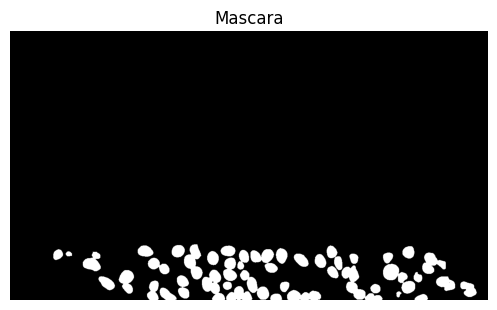

In [119]:
# Creamos una figura para mostrar la imágene
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.title("Mascara")
plt.axis("off")

plt.tight_layout()
plt.show()

Para contar los objetos vamos a etiquetarlos  
- Usamos la función label de scipy.
- Lo que hace esta función es etiquetar los valores de una array-matriz.  
- Cualquier valor que sea distinto a 0 es una caracteristica (objeto a contar), cada 0 es considerado background.
- Devuelve: 
    - Un ndarray de número entero donde cada característica única en la entrada tiene una etiqueta única en la matriz devuelta.
    - Cuantos objetos fueron encontrados.

#### ([[0,0,1,1,0,0],  
#### [0,0,0,1,0,0],  
#### [1,1,0,0,1,0],  
#### [0,0,0,1,0,0]])  

In [130]:
# Etiquetamos los objetos binarios
labeled_mask, num_objects = label(mask)

# Mostramos el resultado
print(f"Número total de objetos binarios (células): {num_objects}")

Número total de objetos binarios (células): 42


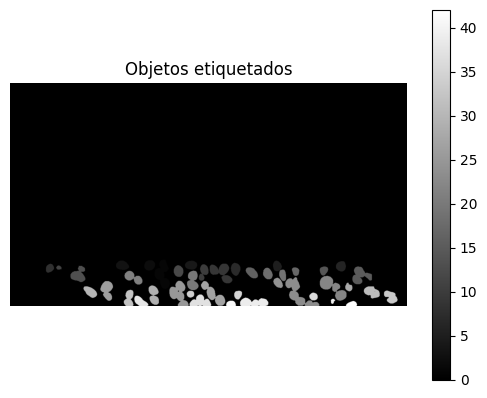

In [121]:
# Visualizamos la máscara con las etiquetas
plt.imshow(labeled_mask, cmap='gray')
plt.colorbar()
plt.title("Objetos etiquetados")

plt.axis("off")
plt.show()

Area  
- Ya tenemos los objetos etiquetados del punto anterior, lo que haremos es calcular el area de cada objeto y luego calcular el promedio.

In [122]:
# Calculamos el área de cada objeto (número de píxeles por etiqueta)
areas = [np.sum(labeled_mask == label_id) for label_id in range(1, num_objects + 1)]

# Calculamos el área promedio
average_area = np.mean(areas)

# Mostramos el resultado
print(f"Área promedio de los objetos: {average_area:.2f} píxeles")

Área promedio de los objetos: 1231.02 píxeles


Operación morfológica de apertura  
- Combina una erosión seguida de una dilatación.  
    - Con esto eliminaremos los pixeles del borde de cada celula y así separar los objetos.
    - Aumenta el tamaño de los objetos, se agregan pixeles alrededor del borde.  
Lo que obtendremos serán más celulas.

Número total de objetos binarios (células): 45


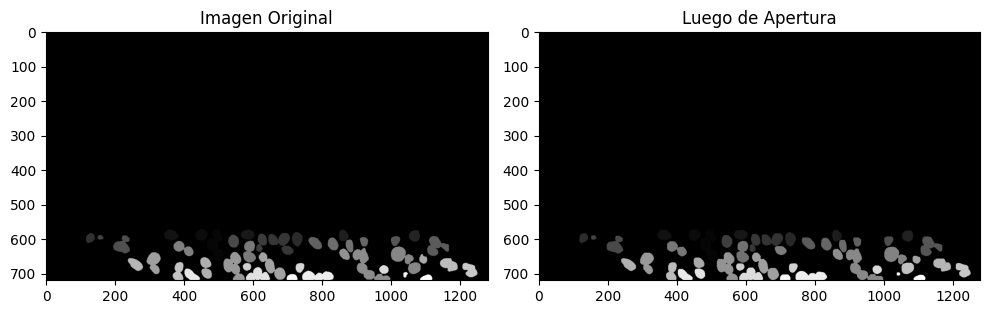

In [123]:
# Crear el elemento estructurante (por ejemplo, un disco)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))  # Elemento estructurante de tamaño 5x5

# Aplicar apertura
opened_img = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Etiquetamos los objetos binarios
labeled_mask_2, num_objects = label(opened_img)

# Mostramos el resultado
print(f"Número total de objetos binarios (células): {num_objects}")

# Mostrar las imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(labeled_mask, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Luego de Apertura")
plt.imshow(labeled_mask_2, cmap='gray')

plt.tight_layout()
plt.show()

#### Combinar Imágenes. 
- Fusionar las dos imágenes y presentar una nueva imagen en donde las máscaras se observen en un color específico dentro de la imagen original Test: ejemplo color azul.

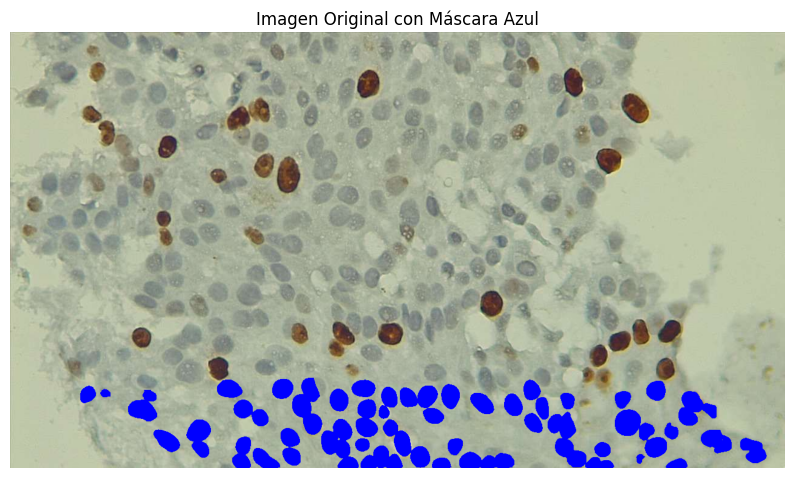

In [ ]:
img = cv2.imread("./testaiimages/Test1.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mask = cv2.imread("./testaiimages/MASK.tif", cv2.IMREAD_GRAYSCALE)
mask = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# máscara de color azul donde la máscara binaria tiene valores 255 (blanco)
s[mask == 255] = [0, 0, 255]  # Color azul (BGR: 0, 0, 255)

# Mostrar la imagen resultante
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.title('Imagen Original con Máscara Azul')
plt.axis('off') 
plt.show()

#### CARACTERISTICAS DE LA IMAGEN mask.tif

In [125]:
mask = cv2.imread("./testaiimages/MASK.tif")

Resolución

In [126]:
mask.shape

(720, 1280, 3)

Formato

In [127]:
np.unique(mask)

array([0, 1], dtype=uint8)

Binaria, valores 0s y 1s.